In [22]:
import scipy.io
import os
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
import pandas as pd
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

## Read a data

In [2]:
train_set = scipy.io.loadmat("p300_DS1.mat")
test_set1 = scipy.io.loadmat("p300_DS2.mat")
test_set2 = scipy.io.loadmat("p300_DS3.mat")

In [3]:
def get_X_Y(data):
    X = data["X"].tolist()
    Y = data["Y"].tolist()[0]
    return X, Y
X_train, Y_train =  get_X_Y(train_set)
X1_test, Y1_test = get_X_Y(test_set1)
X2_test, Y2_test = get_X_Y(test_set2)

## ML 

In [8]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    ]

In [18]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, Y_train).predict(X1_test)
    fp, tp, th = roc_curve(Y1_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, Y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X1_test, Y1_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(Y1_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(Y1_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)





    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/l

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
0,AdaBoostClassifier,1.0000,0.8286,0.857143,0.545455,0.751894
3,GradientBoostingClassifier,1.0000,0.8286,0.857143,0.545455,0.751894
1,BaggingClassifier,1.0000,0.8286,0.857143,0.545455,0.751894
17,DecisionTreeClassifier,1.0000,0.8286,0.857143,0.545455,0.751894
7,PassiveAggressiveClassifier,0.9714,0.8000,1.000000,0.363636,0.681818
8,RidgeClassifierCV,1.0000,0.8000,0.833333,0.454545,0.706439
16,LinearSVC,1.0000,0.8000,0.833333,0.454545,0.706439
9,SGDClassifier,0.9429,0.8000,0.833333,0.454545,0.706439
6,LogisticRegressionCV,1.0000,0.7714,0.714286,0.454545,0.685606
10,Perceptron,1.0000,0.7714,0.800000,0.363636,0.660985


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 

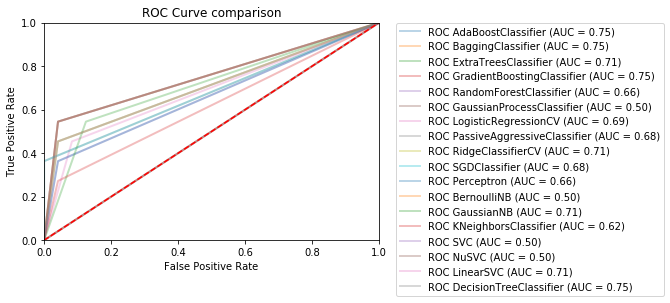

In [23]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, Y_train).predict(X1_test)
    fp, tp, th = roc_curve(Y1_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()